# STAT 6240.G Statistical Data Mining
## Spring 2021
## Homework 2: Classification and Clustering
## Muzhe Guo

https://github.com/Mooozer/Stats6240/blob/main/HW2_Guo_Muzhe.ipynb

## Q1. 

(Chap 2 Exercise 18) This exercise compares and contrasts some similarity and distance measures.

### (a) 
For binary data, the L1 distance corresponds to the Hamming distance; that is, the number of bits that are different between two binary vectors.The Jaccard similarity is a measure of the similarity between two binary vectors. Compute the Hamming distance and the Jaccard similarity between the following two binary vectors.

x = 0101010001
y = 0100011000

### Solution: 

f01 = the number of attributes where x was 0 and y was 1 

f10 = the number of attributes where x was 1 and y was 0 

f00 = the number of attributes where x was 0 and y was 0

f11 = the number of attributes where x was 1 and y was 1

Hamming distance is $f01 + f10 = 3$

Jaccard similarity is $\frac{f11}{f01 + f10 + f11} = 0.4$ 


### (b)
Which approach, Jaccard or Hamming distance, is more similar to the Simple Matching Coeficient, and which approach is more similar to the cosine measure? Explain. (Note: The Hamming measure is a distance,while the other three measures are similarities, but don't let this confuse you.)

### Solution: 

Simple Matching Coefficients $SMC = \frac{f11+f00}{f01 + f10 + f11 + f00}$   

cosine measure $cos(x,y) = \frac{<x,y>}{||x|| \cdot  ||y|| }  $   

Therefore, Hamming distance is more similar to the Simple Matching Coeficient(SMC) since Hamming distance = $length(x) \cdot (1 - SMC) $

Jaccard similarity is more similar to the cosine measure since both of them ignored the 0-0 matches.

### (c) 

Suppose that you are comparing how similar two organisms of different species are in terms of the number of genes they share. Describe which measure, Hamming or Jaccard, you think would be more appropriate for comparing the genetic makeup of two organisms. Explain. (Assume that each animal is represented as a binary vector, where each attribute is 1 if a particular gene is present in the organism and 0 otherwise.)


### Solution: 

Jaccard is more appropriate. 
Because we want to know the number of genes two organisms share, we should ignore the 0-0 matches. 


### (d) 
If you wanted to compare the genetic makeup of two organisms of the same species, e.g., two human beings, would you use the Hamming distance,the Jaccard coeficient, or a different measure of similarity or distance? Explain. (Note that two human beings share > 99.9% of the same genes.)

### Solution: 

Hamming distance. 

Since two human beings share > 99.9% of the same genes, we should focus on the difference.  

## Q2. 

What is the idea/algorithm of K-means clustering, Hierarchical clustering, and DBSCAN? (In other words, how do they work?) What are their strength and weakness? You may use examples. 

### Solution: 

$\bullet$ K-means clustering

1. Algorithm: 

    Select k points as the initial centroids.

    Repeat: (i) Form k clusters by assigning all points to the closest centroids.  (ii) Recompute the centroid of each cluster.
    
    Until the centroids do not change.


2. Strength:
    
    (i) Easy to understand, the basic algorithm is very simple. 
  
    (ii) K-means can be proven to converge for common similarity measures. 
 
 
3. Weakness
    
    (i) Sensitive to outliers.
    
    (ii) May produce very small clusters (possibly corresponding to outliers).
    
    (iii) Difficulties with clusters of different sizes and densities, and non-spherical shapes.

$\bullet$ Hierarchical clustering

1. Algorithm:  

    Let each data point be a cluster, compute (or given) the dissimilarity matrix. 
    
    Repeat: (i) Merge the two closest clusters. (ii) Update the dissimilarity matrix (MIN, MAX, Group average, Distance between centroids, other methods driven by an objective function, ect.). 
    
    Until only a single cluster remains.
    
    
2. Strength:

    (i) Gives a family of possible solutions.
    
    (ii) In many cases, results in meaningful hierarchy.
    
    (iii) Don't require raw data. 
    
3. Weakness:

    (i) No optimization criterion.
    
    (ii) Different ways of measuring distance between clusters can give rise to very different solutions
    
    (iii) Greedy algorithm
    

$\bullet$ DBSCAN

1. Algorithm:  
    
    Label all points as core, border, or noise points.
    
    Eliminate noise points.
    
    Put an edge between all core points that are within Eps(number of points within a specified radius) of each other. 
    
    Make each group of connected core point into a separate cluster.
    
    Assign each border points to one of the clusters of its associated core points. 
    
2. Strength:

    (i) Resistant to noise. 
    
    (ii) Can handle clusters of different shapes and sizes. 
   
3. Weakness:

    (i) Works badly with varying densities data. 
    
    (ii) Works badly for high-dimensional data.

## Q3. 

Clustering Algorithm Practice.

Choose three clustering algorithms, run the dataset in Blackboard folder: Homework2->clustering-dataset, implement the three clustering algorithms and visualize them.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set() 

In [124]:
Cdata1 = np.loadtxt("./Clustering-dataset/Clustering1.txt", dtype=str)[1:,].astype(np.float)
Cdata3 = np.loadtxt("./Clustering-dataset/Clustering3.txt", dtype=str)[1:,].astype(np.float)
Cdata4 = np.loadtxt("./Clustering-dataset/Clustering4.txt", dtype=str)[1:,].astype(np.float)
Cdata5 = np.loadtxt("./Clustering-dataset/Clustering5.txt", dtype=str)[1:,].astype(np.float)

### (i) K-means clustering

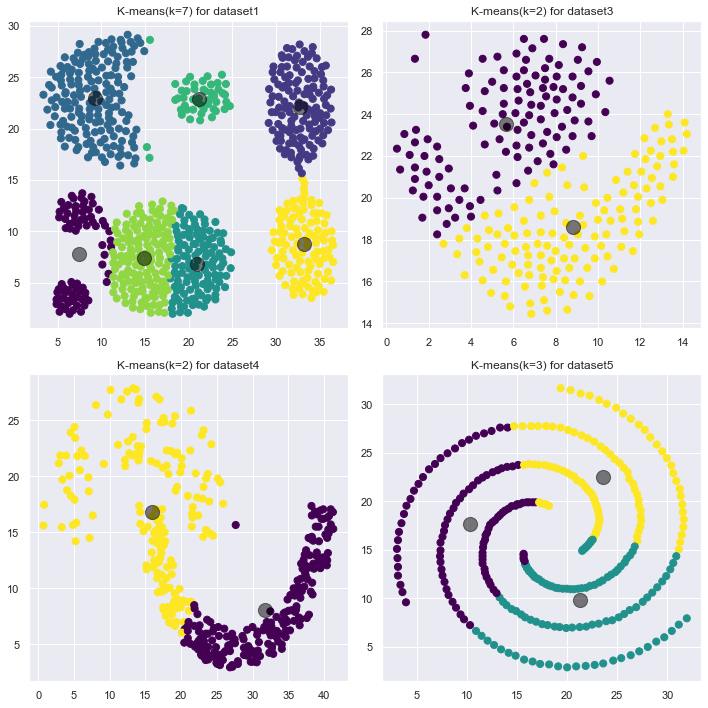

In [484]:
def KMeansPlot(k, data, dataName):
    Cdata = data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Cdata)
    y_kmeans = kmeans.predict(Cdata)
    plt.scatter(Cdata[:, 0], Cdata[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    plt.title('K-means(k=%s) for %s' %(k, dataName))

plt.figure(figsize=(10,10))  
plt.subplot(221)
KMeansPlot(7,Cdata1,'dataset1')
plt.subplot(222)
KMeansPlot(2,Cdata3,'dataset3')
plt.subplot(223)
KMeansPlot(2,Cdata4,'dataset4')
plt.subplot(224)
KMeansPlot(3,Cdata5,'dataset5')
_ =plt.tight_layout()

### (ii) Hierarchical clustering (linkage='average')

In [6]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

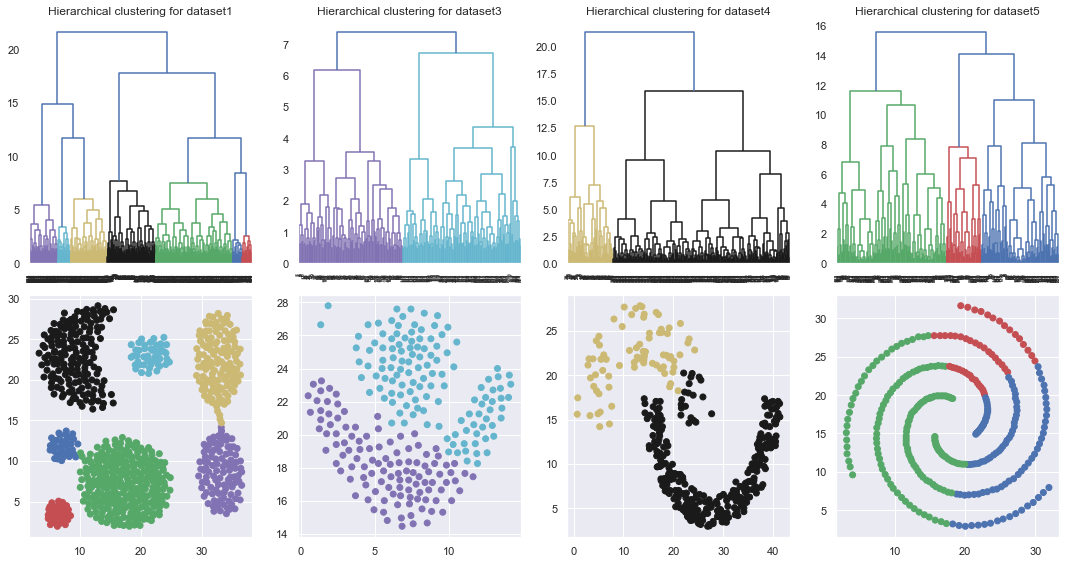

In [407]:
plt.figure(figsize=(15,8))  
plt.subplot(241)
colors1 = ['m', 'c', 'y', 'k', 'g', 'b', 'r'] #manually check
shc.set_link_color_palette(colors1)
plt.title("Hierarchical clustering for dataset1")   
dend = shc.dendrogram(shc.linkage(Cdata1, method='average'), color_threshold=8.1)

plt.subplot(245)
colors11 = ['k', 'g', 'c', 'm', 'y', 'b', 'r'] #manually check
cluster1 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')  
cluster1.fit_predict(Cdata1)
plt.scatter(Cdata1[:,0],Cdata1[:,1],c=[colors11[i] for i in cluster1.labels_]) 
#tree_num_stat = {v+1: k for k, v in Counter(dend['color_list']).items()} #statistic of number of colors in tree plot
#scatter_num_stat = Counter(list(cluster.fit_predict(Cdata3))) #statistic of number of colors in scatter plot 

plt.subplot(242)
colors3 = ['m', 'c'] #manually check
shc.set_link_color_palette(colors3)
plt.title("Hierarchical clustering for dataset3")   
dend = shc.dendrogram(shc.linkage(Cdata3, method='average'),color_threshold=7)

plt.subplot(246)
colors33 = ['c', 'm'] #manually check
cluster3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster3.fit_predict(Cdata3)
plt.scatter(Cdata3[:,0],Cdata3[:,1],c=[colors33[i] for i in cluster3.labels_]) 

plt.subplot(243)
colors4 = ['y', 'k'] #manually check
shc.set_link_color_palette(colors4)
plt.title("Hierarchical clustering for dataset4")   
dend = shc.dendrogram(shc.linkage(Cdata4, method='average'),color_threshold=20)

plt.subplot(247)
colors44 = ['k', 'y'] #manually check
cluster4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster4.fit_predict(Cdata4)
plt.scatter(Cdata4[:,0],Cdata4[:,1],c=[colors44[i] for i in cluster4.labels_]) 

plt.subplot(244)
colors5 = ['g', 'r','b'] #manually check
shc.set_link_color_palette(colors5)
plt.title("Hierarchical clustering for dataset5")   
dend = shc.dendrogram(shc.linkage(Cdata5, method='average'),color_threshold=13)

plt.subplot(248)
colors55 = ['g', 'b','r'] #manually check
cluster5 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cluster5.fit_predict(Cdata5)
plt.scatter(Cdata5[:,0],Cdata5[:,1],c=[colors55[i] for i in cluster5.labels_]) 

_ =plt.tight_layout()

### (iIi) DBSCAN 

In [7]:
from sklearn.cluster import DBSCAN

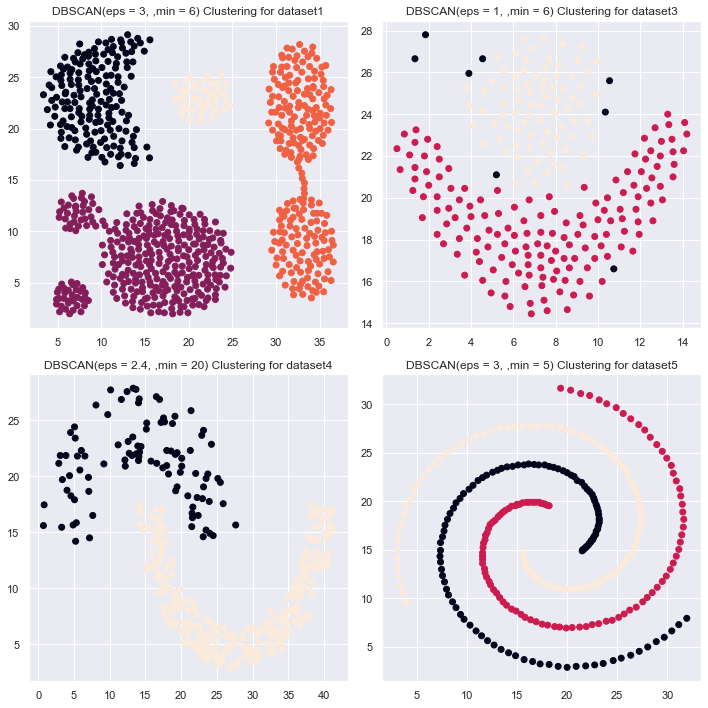

In [487]:
def DBSCAN_Plot(eps, min_samples, data, dataName):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data)
    plt.scatter(data[:,0],data[:,1],c=dbscan.labels_)
    plt.title('DBSCAN(eps = %s, ,min = %s) Clustering for %s' %(eps, min_samples,dataName))

plt.figure(figsize=(10,10))  
plt.subplot(221)
DBSCAN_Plot(3,6,Cdata1,'dataset1')
plt.subplot(222)
DBSCAN_Plot(1,6,Cdata3,'dataset3')
plt.subplot(223)
DBSCAN_Plot(2.4,20,Cdata4,'dataset4')
plt.subplot(224)
DBSCAN_Plot(3,5,Cdata5,'dataset5')
_ =plt.tight_layout()


## Q4. 

SVM and KNN. Given a dataset SocialNetworkAds.csv, build a classifier using both SVM and KNN.		

1.Evaluate your classifier performance using recall, precision and F-measure 

2.Visualize your classification results. 

3.Compare with SVM and KNN classifiers.

In [10]:
import pandas as pd
SocialNetworkAds  = pd.read_csv('./SocialNetworkAds.csv') 

### (i) KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(knn_X, knn_y, test_size = 0.2, random_state=6)
knn_X = SocialNetworkAds[['Age','EstimatedSalary']]
knn_X_rescale = (knn_X-knn_X.min(0).values)/(knn_X.max(0).values - knn_X.min(0).values) #Rescale

knn_y = SocialNetworkAds['Purchased']
knnclassifier6 = KNeighborsClassifier(n_neighbors=6)
knnclassifier6 = knnclassifier6.fit(knn_X_rescale, knn_y)
y_pred_knn = knnclassifier6.predict(knn_X_rescale)

print('KNN:')
print('------------------------------------------------------')
print(confusion_matrix(knn_y,y_pred_knn))
print(classification_report(knn_y,y_pred_knn))

KNN:
------------------------------------------------------
[[242  15]
 [ 21 122]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       257
           1       0.89      0.85      0.87       143

    accuracy                           0.91       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



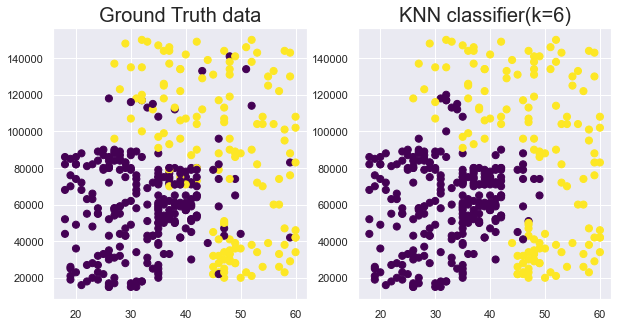

In [56]:
plt.figure(figsize=(10,5))  
plt.subplot(121)
plt.scatter(knn_X['Age'], knn_X['EstimatedSalary'], c=knn_y, s=50, cmap='viridis')
plt.title('Ground Truth data',fontsize=20)

plt.subplot(122)
plt.scatter(knn_X['Age'], knn_X['EstimatedSalary'], c=y_pred_knn, s=50, cmap='viridis')
plt.title('KNN classifier(k=6)',fontsize=20)
plt.show()

### (ii) SVM

In [62]:
from sklearn.svm import SVC
svm_X = SocialNetworkAds[['Age','EstimatedSalary']]
svm_X_rescale = (svm_X-svm_X.min(0).values)/(svm_X.max(0).values - svm_X.min(0).values) #Rescale
svm_y = SocialNetworkAds['Purchased']

svclassifier = SVC(kernel='linear')  #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
svclassifier = svclassifier.fit(svm_X_rescale, svm_y)


In [63]:
y_pred_svm = svclassifier.predict(svm_X_rescale)
print('SVM:')
print('------------------------------------------------------')
print(confusion_matrix(svm_y,y_pred_svm))
print(classification_report(svm_y,y_pred_svm))

SVM:
------------------------------------------------------
[[241  16]
 [ 51  92]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       257
           1       0.85      0.64      0.73       143

    accuracy                           0.83       400
   macro avg       0.84      0.79      0.81       400
weighted avg       0.83      0.83      0.83       400



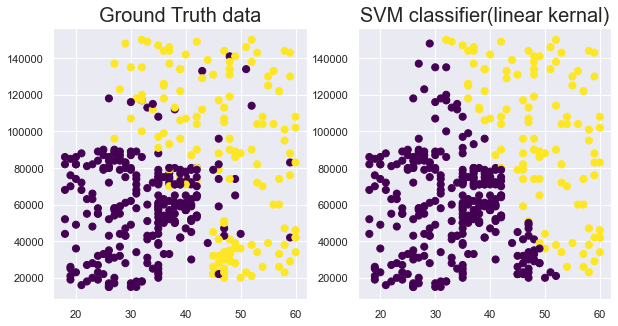

In [64]:
plt.figure(figsize=(10,5))  
plt.subplot(121)
plt.scatter(svm_X['Age'], svm_X['EstimatedSalary'], c=svm_y, s=50, cmap='viridis')
plt.title('Ground Truth data',fontsize=20)

plt.subplot(122)
plt.scatter(svm_X['Age'], svm_X['EstimatedSalary'], c=y_pred_svm, s=50, cmap='viridis')
plt.title('SVM classifier(linear kernal)',fontsize=20)
plt.show()

In [66]:
svclassifier2 = SVC(kernel='poly') 
svclassifier2 = svclassifier2.fit(svm_X_rescale, svm_y)
y_pred_svm2 = svclassifier2.predict(svm_X_rescale)
print('SVM:')
print('------------------------------------------------------')
print(confusion_matrix(svm_y,y_pred_svm2))
print(classification_report(svm_y,y_pred_svm2))

SVM:
------------------------------------------------------
[[238  19]
 [ 21 122]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       257
           1       0.87      0.85      0.86       143

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



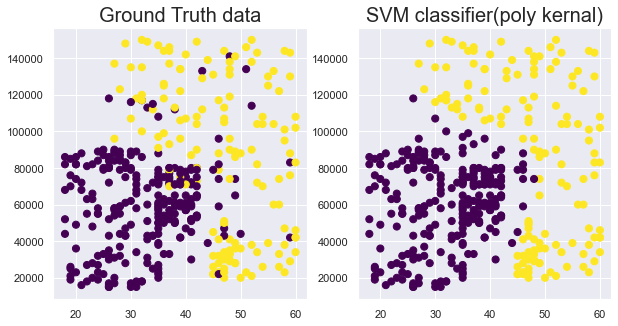

In [67]:
plt.figure(figsize=(10,5))  
plt.subplot(121)
plt.scatter(svm_X['Age'], svm_X['EstimatedSalary'], c=svm_y, s=50, cmap='viridis')
plt.title('Ground Truth data',fontsize=20)

plt.subplot(122)
plt.scatter(svm_X['Age'], svm_X['EstimatedSalary'], c=y_pred_svm2, s=50, cmap='viridis')
plt.title('SVM classifier(poly kernal)',fontsize=20)
plt.show()

Compare with SVM and KNN classifiers: For the KNN with k=6 and the SVM with linear kernal, KNN classifer performs better since its precision, recall and f1-score are higher than those of SVM. 

For the SVM with poly kernal, it perfroms similarly to KNN classifiers.